In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Обучим дерево решений предсказывать выжил или не выжил пассажир, основываясь на данных, которые у нас есть

# проверим наличие пропущенных значений
titanic_data.isnull() # возвращает для каждого наблюдения True\False в зависимости пропущено оно или нет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
titanic_data.isnull().sum() # посмотрим для каждой колонки - сколько в ней пропущено значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1) # axis=1 означает колонки
# дропнули ненужные\пропущенные данные и те, что мы хотим предсказывать

In [6]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [7]:
y = titanic_data.Survived

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
# clf.fit(X, y)

In [10]:
# поймали ошибку, тк эта реализация может работать только с числовыми данными -> номинативные переменные мы должны закодировать
# в виде чисел. А со строками работать не получится.

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
X = pd.get_dummies(X) # Метод, который сам понимаем какие переменные нужно конвертировать в dummies variables
X.head() # наши строковые переменные разбились на несколько, в зависимости от принимаемых значений.

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
# Sex_female и Sex_male дублирует друг друга - мы можем определить пол лишь по одной из них.

In [14]:
# clf.fit(X, y)

In [15]:
# Опять поймали ошибку. Тк эта имплементация дерева решений не умеет работаь с пропущенными значениями.
# Можем попробовать предсказать Age или Cabin по доступным данным и заполнить значения предсказанными. Сейчас не будем
# Заполним пропущенные значения медианным значением возраста.

In [16]:
X.Age.median() # Лучше было сделать медианное значение для каждого из полов, а не для всех людей. Сейчас не будем
# Сделаем Baseline model - самую простую, без хитростей

28.0

In [17]:
X = X.fillna({'Age': X.Age.median()}) # заполним пропущенный возраст медианным значением
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [18]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [19]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(3442.3606534090904, 1325.025, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(2203.8622159090905, 1257.075, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(1123.1335227272727, 1189.125, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]\nclass = Died'),
 Text(456.5454545454545, 1121.175, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]\nclass = Survived'),
 Text(415.96363636363634, 1053.225, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]\nclass = Survived'),
 Text(375.3818181818182, 985.275, 'Age <= 11.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(334.79999999999995, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Died'),
 Text(415.96363636363634, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(456.5454545454545, 985.275, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Survived

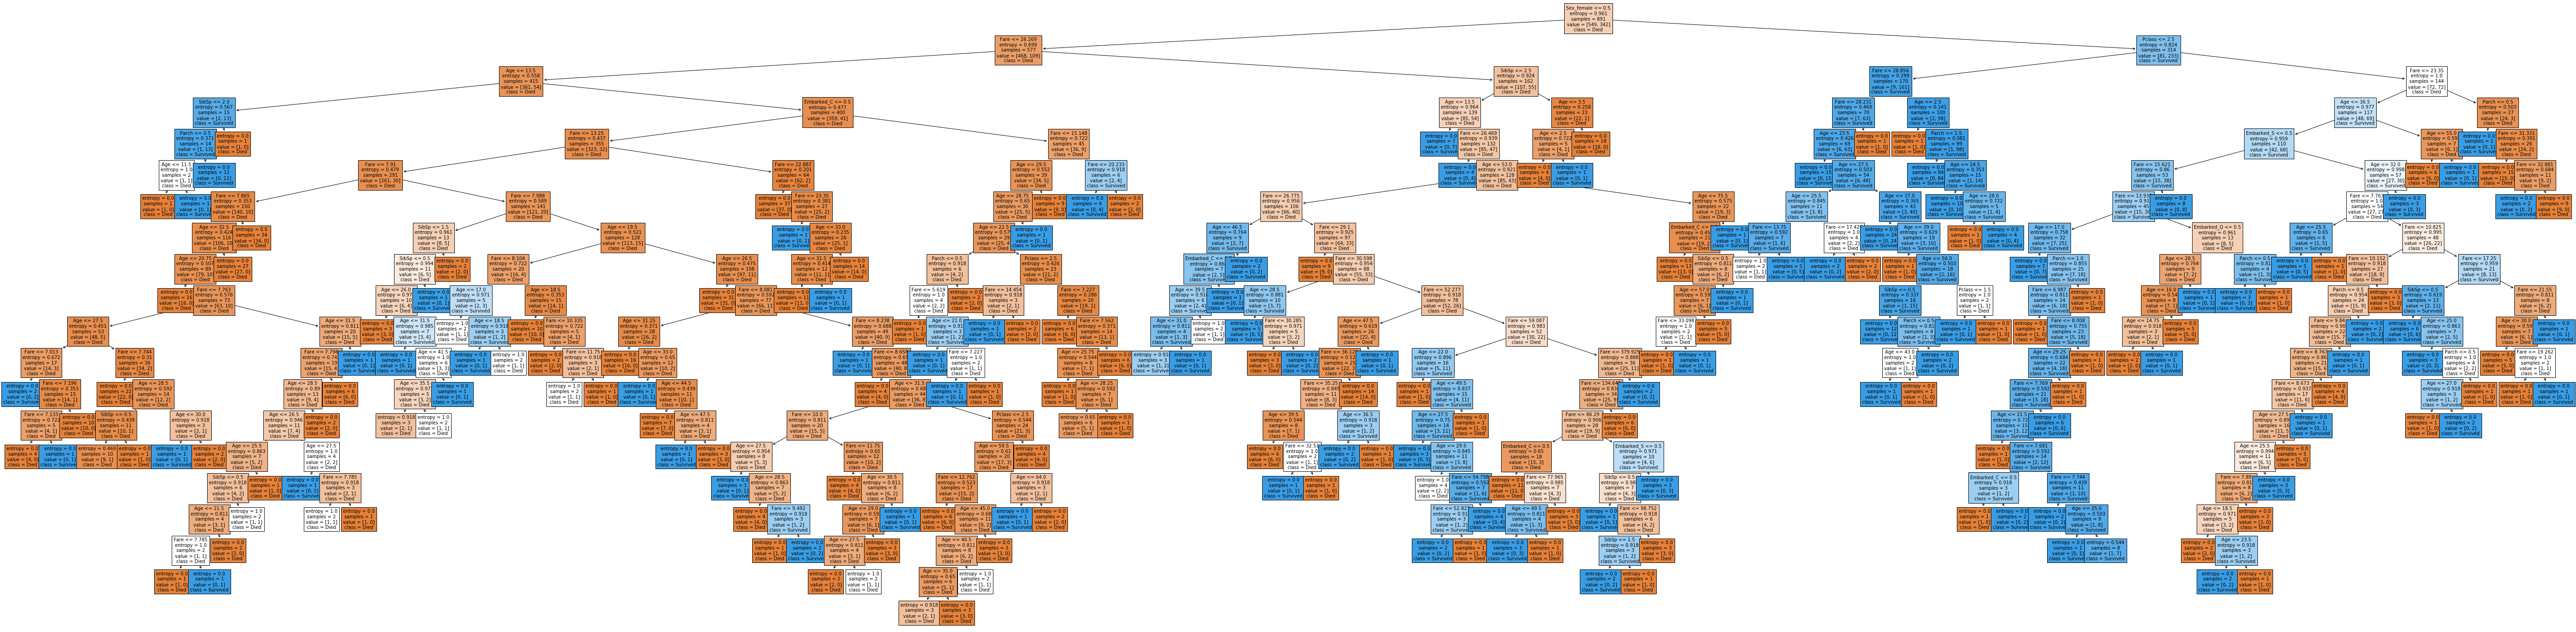

In [20]:
plt.figure(figsize=(100, 25)) # размер дерева
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True, fontsize=10) # fontsize=100 размер надписей (блоков)

In [21]:
# Первый сплит по полу, а дальше что-то пошло не так.

# Дерево решений не ставит своей целью вычленить закономерность или общее генерализированное правило.
# Пока оно может снизить энтропию - оно будет ее снижать. Это не тоже самое, что и выяснить оющую закономерность.

# Мы пронаблюдали овервиттинг или переобучение нашей модели. Дерево безошибочно классифицировало все наблюдения в нашей модели.

In [22]:
# Как добиться от дерева не идеальной классификации, а вычленения закономерности? Сдесть приходит на помощь 
# концепция подбора параметров. Можем ограничить глубину дерева (кол-во сплитов) - отчасти решает проблему переобучения.
# мы должны как можно меньшими ресурсами добиться кк можно лучшего результата.

In [23]:
from sklearn.model_selection import train_test_split # Метод для разбиения датасета на обучаемый и тестовый

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # пропорция разбиения - 33%

In [25]:
X_train.shape

(596, 10)

In [26]:
X_test.shape

(295, 10)

In [27]:
# Само по себе большое дерево - не проблема. Мб оно научилось предсказывать безошибочно?
# Можем проверить насколько хорошо оно предсказывает на train и насколько хорошо на test

# Это очень сильно упрощенная валидация модели.

In [28]:
clf.score(X, y) # предсказывает число правильных ответов

0.9797979797979798

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
clf.score(X_train, y_train) # точность на обучающихся данных

0.9798657718120806

In [31]:
# А теперь дадим классификатору те данные. которые он не видел
clf.score(X_test, y_test) # точность снизилась - это потому, что мы переобучили дерево

0.7830508474576271

In [32]:
# Самый простой способ не классифицировать все идельно, а вычленить закономерность - ограничить глубину дерева
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [33]:
clf.fit(X_train, y_train) # Обучим классификатор на тренировочном наборе
clf.score(X_train, y_train) # точность на обучающихся данных

0.8406040268456376

In [34]:
# на тренировочном наборе классификатор стал работать хуже

clf.score(X_test, y_test)

0.8101694915254237

In [35]:
# А вот на тестовых данных точность повысилась

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
clf.fit(X_train, y_train) # Обучим классификатор на тренировочном наборе
clf.score(X_train, y_train) # точность на обучающихся данных

0.8238255033557047

In [38]:
clf.score(X_test, y_test)

0.8203389830508474

In [39]:
# При глубине дерева 3 точноссть  на тестовом множесте станет еще больше.

In [40]:
# В sklearn есть более эффективные методы для подбора параметров. но мы сделаем так:
scores_data = pd.DataFrame()

In [41]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.772881
0,96,0.979866,0.779661
0,97,0.979866,0.769492
0,98,0.979866,0.789831


In [43]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.772881
194,96,test_score,0.779661
195,97,test_score,0.769492
196,98,test_score,0.789831


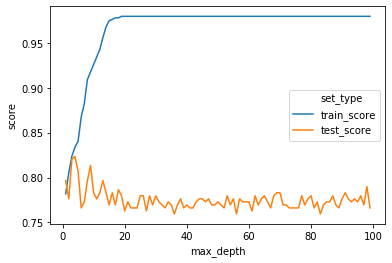

In [44]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long) # визуализируем данные

In [45]:
# Проблема в том, что модель крутилась на трейн сете, для подбора оптимальных параметров для тест сета (брутфорс). Наша модель
# все еще переобучена, даже при глубине дерева равной 3.

# если мы действительно хотим убедить что найденная закономерность - обощенная закономерность и мы не переобучились, мы не
# должны злоупотреблять сравнением трейна и теста. Можем сделать такое сравнение только 1 раз. А когда подбираем оптимальный 
# параметр для тренировочного-тестового множества, мы все еще переобучиваемся. Как от этого уйти - валидация моделей.
# Полность избежать переобучения неудастся. Способов снизить переобучаемость много. Один из способов - кроссвалидация.

In [46]:
# Для того чтобы избежать переобучения, нам нужно разбить данные на обучающиеся, валидирующие (для подбора параметров) и на
# тесовое, чтобы показать тестовое только один раз. И оценка тестового множеста и будет самой важной (без переобучения)

# train dataset используется для тренировки модели, validation - для её проверки, тестовый датасет выступает как ещё один 
# уровень проверки, которая происходит на не показанных модели ранее данных

In [47]:
# Мы тестировали нашу модель на одном и том же наборе тестовых данных.

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
cross_val_score(clf, X_train, y_train, cv=5) # cv=5 на сколько hold мы хотим разбить наше множество

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [51]:
# точности которые показал классификатор, при разбивки данных на 5 кусков.
# Сначала обучился на первых 4-х и предсказал 5-ый. Потом обучился на всех, кроме 4-ого, и предсказал 4-ый и тд

# такие показатели более честные (устойчивые к переобучению) тк мы все данные задействовали и для трейна и для теста

In [52]:
cross_val_score(clf, X_train, y_train, cv=5).mean() # средняя точность на кросс-валидации

0.7886274509803922

In [53]:
# Подправим наш первый подход

scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score],
                                        'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [54]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.798711
...,...,...,...,...
0,95,0.979866,0.759322,0.770182
0,96,0.979866,0.762712,0.771863
0,97,0.979866,0.779661,0.771877
0,98,0.979866,0.772881,0.766835


In [55]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.771863
294,97,cross_val_score,0.771877
295,98,cross_val_score,0.766835


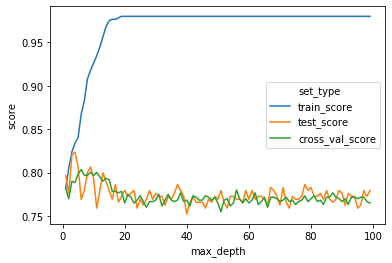

In [56]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long) # визуализируем данные

In [57]:
# максимальная средняя точность при кросс-валидации достигается при большей глубине. Он более устойчив к переобучению

In [58]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.800350
207,10,cross_val_score,0.796989


In [59]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
# выберем глубину классификатора с лучшей оценкой и протестим его на финальных тестовых данных.
# В разных запусках она будет разная

In [60]:
best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.7661016949152543

In [61]:
# Эту цифру уже можно использовать как финальное заключительное значение

In [62]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [63]:
iris_X_train = iris_train.drop(['species'], axis=1)
iris_X_train
iris_y_train = iris_train.species.to_frame()
iris_y_train

,species
130,2
7,0
11,0
142,2
109,2
...,...
147,2
124,2
123,2
146,2


In [64]:
iris_X_test = iris_test.drop(['species'], axis=1)
iris_X_test
iris_y_test = iris_test.species.to_frame()
iris_y_test

,species
114,2
70,1
138,2
59,1
44,0
125,2
36,0
141,2
12,0
63,1


In [65]:
iris_scores_data = pd.DataFrame()

In [66]:
np.random.seed(0)
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(iris_X_train, iris_y_train)
    train_score = clf.score(iris_X_train, iris_y_train)
    test_score = clf.score(iris_X_test, iris_y_test)
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score]})
    iris_scores_data = iris_scores_data.append(temp_score_data)
    
iris_scores_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


In [67]:
iris_scores_data_long = pd.melt(iris_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
iris_scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


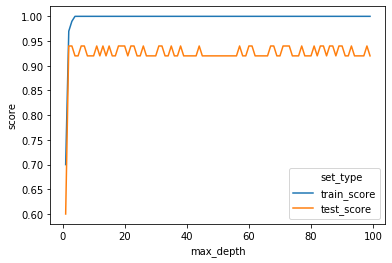

In [68]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=iris_scores_data_long) # визуализируем данные

In [69]:
# На самом деле в примере с титаником нам нужно оптимизировать не точность классификации пассажиров. (Если выжило мало и всем
# говорить что он не выжил - точность будет высокая). Насколько хорошо у нас получается погибших пассажиров классифицировать
# как погибших, а выживших как выживших. В идеале классы должны быть уровновешаны, но есть способы работы и с 
# неоднородным распределением

In [70]:
# скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.
dogncats_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
dogncats_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [74]:
X = dogncats_data.drop(['Вид'], axis=1)
X
y = dogncats_data['Вид'].to_frame()
y

,Вид
0,собачка
1,собачка
2,собачка
3,собачка
4,собачка
...,...
995,котик
996,котик
997,котик
998,котик


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # пропорция разбиения - 33%

In [76]:
scores_data = pd.DataFrame()

for max_depth in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score],
                                        'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [77]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0
...,...,...,...
142,45,cross_val_score,1.0
143,46,cross_val_score,1.0
144,47,cross_val_score,1.0
145,48,cross_val_score,1.0


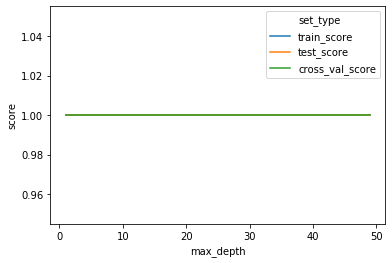

In [78]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long) # визуализируем данные

In [79]:
final_test = pd.read_json('dataset_209691_15.txt')
final_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,29,34.8,1,0,0
1,32,38.4,1,1,0
2,30,36.0,1,1,0
3,29,34.8,1,1,0
4,24,28.8,1,1,0
...,...,...,...,...,...
95,6,2.4,1,0,1
96,13,5.2,1,0,1
97,14,5.6,1,0,1
98,10,4.0,1,0,1


In [83]:
list(clf.predict(final_test)).count('собачка') # clf.predict(final_test) - предсказывает по обученной модели

54

In [84]:
# Метрика accuracy - общий процент правильных ответов - бесполезна и вводит в заблуждение. Нам важна не только аккуратность,
# но и насколько наша модель справляется с классификацией внутри каждого из классов. Наксколько хорошо она умеет находить 
# положительный класс среди всех, насколько хорошо отделяет их от отрицательного класса.

# Главные метрики в задачах классификации - Precision, recall и Ф-мера

In [85]:
# Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно 
# являющимися положительными, 
# recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

# F1 = 2 * (precision * recall) / (precision + recall)

In [86]:
# В sklearn есть удобная функция _metrics.classificationreport, возвращающая recall, precision и F-меру для каждого из 
# классов, а также количество экземпляров каждого класса.


# report = classification_report(y_test, lr.predict(X_test), target_names=['Non-churned', 'Churned'])
# print(report)

In [88]:
from sklearn.metrics import precision_score

In [89]:
# Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. 
# Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в 
# переменную precision.

#clf = DecisionTreeClassifier(criterion='entropy')
#clf.fit(X_train, y_train)
#predictions = clf.predict(X_test)
#precision = precision_score(y_test, predictions, average='micro')

In [90]:
# Вернемся к задаче с титаником.

In [ ]:
# Методы для рассчета метрик есстественно реализованы в библиотеке. Нам не нужно в ручную искать их.
